## ASSIGNMENT 5
## EP20BTECH11007
## Gowri Govindaraj

## q1

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats


In [198]:
dataq1 = pd.read_csv('q1.txt',header = None)

Applying shapiro wilk test to the values, 
 W = 0.9246721863746643 and p-value = 0.051220282912254333
Applying shapiro wilk test to the log of values 
 W = 0.9686304926872253 p-value = 0.5660569667816162


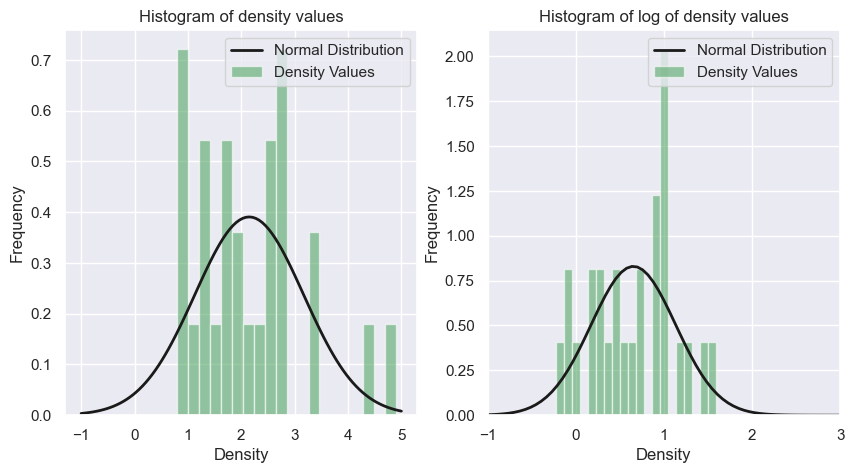

In [200]:
density_values = dataq1[1]
stat, p = stats.shapiro(density_values)
print('Applying shapiro wilk test to the values, \n', 'W =', stat, 'and p-value =', p)

stat_log, p_log = stats.shapiro(np.log(density_values))
print('Applying shapiro wilk test to the log of values \n', 'W =', stat_log, 'p-value =', p_log)

mu, sig = stats.norm.fit(density_values)
mu_log, sigma_log = stats.norm.fit(np.log(density_values))

x = np.linspace(-1,5, 100)

pdf = stats.norm.pdf(x, mu, sig)
pdf_log = stats.norm.pdf(x, mu_log, sigma_log)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(density_values, bins=20, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'k', linewidth=2)
plt.title('Histogram of density values')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.legend(['Normal Distribution', 'Density Values'])
# plt.show()


plt.subplot(1, 2, 2)
plt.hist(np.log(density_values), bins=20, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_log, 'k', linewidth=2)
plt.title('Histogram of log of density values')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.xlim(-1, 3)
plt.legend(['Normal Distribution', 'Density Values'])
plt.show()


## Q2

In [201]:
dataq2 = pd.read_csv('HIP_star.txt',sep='\s',engine='python')

In [206]:
hyades = dataq2[(dataq2['RA']>=50) & (dataq2['RA']<=100) & (dataq2['DE']>=0) & (dataq2['DE']<=25) & 
                (dataq2['pmRA']>=90) & (dataq2['pmRA']<=130) & (dataq2['pmDE']>=-60) & (dataq2['pmDE']<=-10)]

In [207]:
non_hyades = dataq2.drop(hyades.index)

In [209]:
statistics = stats.ttest_ind(hyades, non_hyades)
print('The p-value for the two-sample t-test is ',statistics.pvalue[8])

The p-value for the two-sample t-test is  0.0001158222219244234


For the null hypothesis that the color of Haydes stars and non-Haydes stars have identical colour, the p-value is very small
Therefore, the colours vary


## Q3

In [210]:
dataq3 = pd.read_csv('BeppoSAX.txt',sep='\s',engine='python',header=None)

In [212]:
dataq3_log = np.log10(dataq3[0])


In [213]:
X = dataq3_log.tolist()
X = np.array(X).reshape(-1 , 1)

In [214]:
from sklearn.mixture import GaussianMixture

In [216]:
#reference used AstroML 6.6
N = np.arange(1, 21)

def compute_GaussianMixture(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components = N[i], max_iter = max_iter, covariance_type = covariance_type)
        models[i].fit(X)
    return models

models = compute_GaussianMixture(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

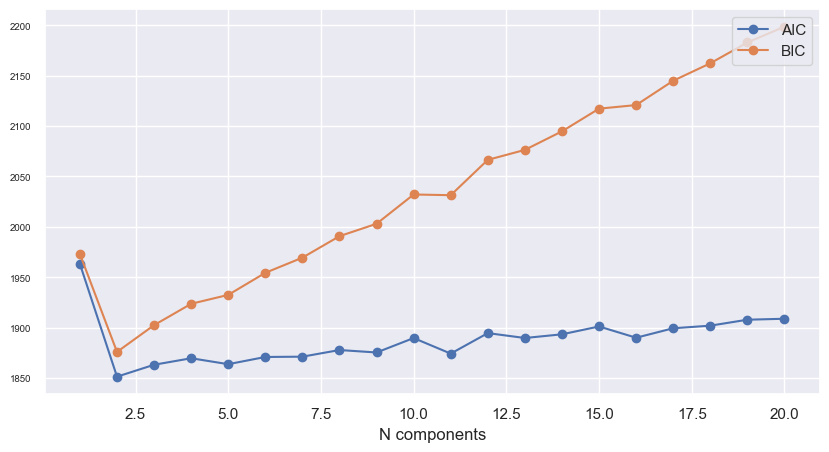

In [222]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N, AIC, 'o-', label='AIC')
ax.plot(N, BIC, 'o-', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)
plt.show()

From the figure, we can see that the optimal value for the number of components is 2